# Final Exam - Open

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

# Instructions

## Please note the following:

Points
* The exam is `85` points.
* You have `85` minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Final - Open` assignment on Canvas, where you downloaded this. 
* Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers.)
* Your submission should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo - you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

- For Section 1:
    * `data/final_exam_data.xlsx`
- for Section 2:
    * `data/fx_rf_data.xlsx`

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 40     |
| 2       | 45     |

### Each numbered question is worth 5 points unless otherwise specified.

***

In [149]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [150]:
asset_df = pd.read_excel("../data/final_exam_data.xlsx",sheet_name="Asset Returns").set_index("Date")
asset_df.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03,-0.054703,-0.036458,-0.007488,0.004005,-0.007882,-0.003004,0.018398,-0.025943,-0.014274,-0.023866,...,0.002834,-0.020983,-0.006025,0.001733,0.008402,-0.018563,0.000543,-0.007579,-0.057691,-0.018518
2024-01-04,-0.001220,0.010811,-0.012700,0.006232,0.002249,0.013331,0.006888,-0.002456,-0.008290,-0.015294,...,-0.004738,-0.013799,0.001914,0.002359,-0.008719,0.006902,-0.003176,-0.002241,0.001782,0.005753
2024-01-05,-0.003359,0.038961,-0.004013,0.004211,0.016901,-0.001622,-0.008519,-0.001394,-0.004321,0.002580,...,-0.002589,0.002679,0.015285,0.000000,0.003030,-0.001602,-0.002720,-0.001830,-0.001107,0.004174
2024-01-08,0.021599,0.072059,0.024175,-0.004379,0.030152,0.014440,0.004036,0.011081,0.028250,0.013026,...,0.013815,0.010986,0.014637,-0.002354,-0.016662,0.006242,0.002338,0.016586,0.033242,0.006672
2024-01-09,-0.020243,-0.013717,-0.002263,0.005451,-0.003926,0.002936,-0.012578,0.007052,0.009732,0.004127,...,-0.009498,-0.009104,-0.018444,-0.004876,-0.012386,-0.006557,-0.003265,-0.000820,-0.017810,-0.001071


In [151]:
factor_df = pd.read_excel("../data/final_exam_data.xlsx",sheet_name="Factor Returns").set_index("Date")
factor_df.head()

,factor
Date,
2024-01-03,-0.013855
2024-01-04,-0.001325
2024-01-05,0.002717
2024-01-08,0.011078
2024-01-09,-0.004448


In [152]:
betas_df = pd.read_excel("../data/final_exam_data.xlsx",sheet_name="Asset Betas")
betas_df.head()

,Ticker,betas
0,A,1.180943
1,AAL,1.986505
2,AAPL,0.670563
3,ABBV,0.424427
4,ABNB,1.243492


# 1. Cross-Sectional Factor Pricing

Use the data found in the file `final_data.xlsx`. The sheet named `Asset Returns` contains daily excess returns data for various assets; the sheet named `Factor Returns` contains daily excess returns data for some unknown factor; and the sheet named `Asset Betas` contains the betas of each asset with respect to the given factor.

Consider the data to have an annualization factor of `252` days per year.

### 1.
(10pts)

Using linear regression, estimate the factor risk premium for __each point in time__, using the following model: $\phantom{Brian Hood}$ 

$$
\tilde{r}^{(i)}_t = \beta^{(i)}\lambda_t + \epsilon^{(i)}_t
$$

Using your estimated series $\lambda_t$, report...

* the last 3 values. 

* the annualized mean.

* the annualized vol.

In [153]:
betas = betas_df.set_index('Ticker')['betas']
betas = betas[asset_df.columns]

beta_squared_sum = np.sum(betas**2)

lam_series = pd.Series(index=asset_df.index, dtype=float)

for t in asset_df.index:
    r_t = asset_df.loc[t] 
    lam_t = (betas * r_t).sum() / beta_squared_sum
    lam_series[t] = lam_t

print("Last 3 lambda_t values:")
print(lam_series.tail(3))

Last 3 lambda_t values:
Date
2024-11-06    0.022971
2024-11-07    0.001064
2024-11-08    0.001768
dtype: float64


In [154]:
ann_factor = 252

ann_mean = lam_series.mean() * ann_factor
print("Annualized mean:", ann_mean)

ann_vol = lam_series.std() * np.sqrt(ann_factor)
print("Annualized volatility:", ann_vol)

Annualized mean: 0.1754874142533425
Annualized volatility: 0.11688953313031769


### 2.

(10pts)

Compare $\lambda_t$ to the realized factor returns, $\tilde{f}_t$.

* Plot the cumulative (excess) returns of $\lambda_t$ and $\tilde{f}_t$.
* Report the correlation between these two series.
* Report the serial correlation of each series.

Should we expect the serial correlation of $\tilde{f}$ to be near zero? What about $\lambda_t$?

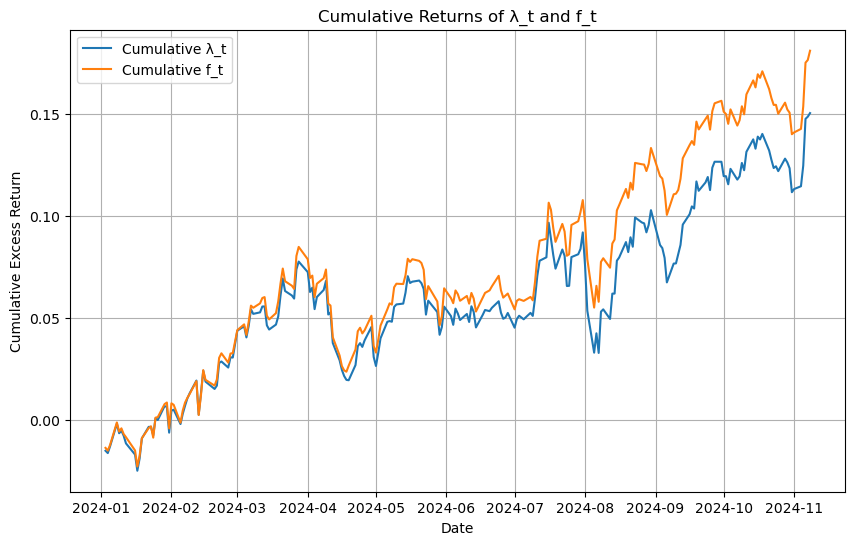

In [155]:
import matplotlib.pyplot as plt

common_idx = lam_series.index.intersection(factor_df.index)
lam_common = lam_series.loc[common_idx]
f_common = factor_df['factor'].loc[common_idx]

lam_cum = lam_common.cumsum()
f_cum = f_common.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(lam_cum, label='Cumulative λ_t')
plt.plot(f_cum, label='Cumulative f_t')
plt.title('Cumulative Returns of λ_t and f_t')
plt.xlabel('Date')
plt.ylabel('Cumulative Excess Return')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
corr = lam_common.corr(f_common)
print("Correlation between λ_t and f_t:", corr)

lam_lag1 = lam_common.shift(1)
f_lag1 = f_common.shift(1)

lam_serial_corr = lam_common.corr(lam_lag1)
f_serial_corr = f_common.corr(f_lag1)

print("Serial correlation of λ_t:", lam_serial_corr)
print("Serial correlation of f_t:", f_serial_corr)

Correlation between λ_t and f_t: 0.9851319641635838
Serial correlation of λ_t: 0.0015639909104252496
Serial correlation of f_t: 0.01843794983534873


Yes, factor returns are usually expected to be unpredictable, so their serial correlation should be near zero. However, for lambda, considering it is a risk premium, it could be more persistent and show some non-zero correlation.

### 3.

We estimated our factor premium in a regression that excluded an intercept term. Why might we have done this? In what circumstance would we prefer to include an intercept term?

Excluding the intercept means that we are certain the factor alone explains expected excess returns. If we think the model is incomplete, then we would want to include the intercept.

### 4.

(10pts)

Now, use the actual factor returns, $\tilde{f}_t$to analyze the fit of this pricing model using a __single__ cross-sectional regression to estimate  
$$
E[r^{(i)}] = \eta + \beta^{(i)} E[\tilde{f}] + \epsilon^{(i)}
$$

How well does this factor work for pricing? Provide supporting evidence for your answer.

In [157]:
import statsmodels.api as sm

avg_returns = asset_df.mean()
avg_factor = factor_df['factor'].mean()

betas_for_reg = betas[avg_returns.index]
X = sm.add_constant(betas_for_reg.values)
y = avg_returns.values
model = sm.OLS(y, X).fit()

print(model.summary())

eta_est = model.params[0] 
gamma_est = model.params[1] 

print("Estimated slope (γ):", gamma_est)
print("Average factor return (E[f]):", avg_factor)

r_squared = model.rsquared
print("R-squared of cross-sectional regression:", r_squared)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1534
Date:                Mon, 09 Dec 2024   Prob (F-statistic):              0.695
Time:                        19:01:35   Log-Likelihood:                 2657.1
No. Observations:                 498   AIC:                            -5310.
Df Residuals:                     496   BIC:                            -5302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      6.409      0.0

No, this factor does not explain the cross section of average returns. The R-squared value is extremely low, slope being close to zero, and non-zero intercept indicate all of this.

### 5.

The factor we've used, $\tilde{f}$ is actually the **equally**-weighted portfolio of equities. Suppose the CAPM holds exactly, with the **value**-weighted market equity portfolio. In that case, what would we expect, theoretically, from the previous section?

If CAPM holds exactly with the value-weighted market portfolio, then using an equally-weighted portfolio as the factor would not produce the theoretical relationships we expect. We would not see a strong linear relationship between betas and average returns and the cross-sectional fit would be poor, which is what we just observed.

***

In [158]:
rf_df = pd.read_excel("../data/fx_rf_data.xlsx",sheet_name="risk-free rates").set_index("date")
rf_df.head()

,USD,JPY,EUR,GBP,MXN,CHF
date,,,,,,
2008-01-01,0.044000,0.00478,0.04250,0.05700,0.075,0.020645
2008-01-02,0.041563,0.00478,0.03600,0.05475,0.075,0.020645
2008-01-03,0.043463,0.00478,0.03940,0.05600,0.075,0.021500
2008-01-04,0.042188,0.00478,0.04065,0.05500,0.075,0.020950
2008-01-07,0.042188,0.00493,0.04100,0.05460,0.075,0.020200


In [159]:
ex_df = pd.read_excel("../data/fx_rf_data.xlsx",sheet_name="exchange rates").set_index("date")
ex_df.head()

,JPY,EUR,GBP,MXN,CHF
date,,,,,
2008-01-01,0.008957,1.4592,1.9864,0.09183,0.8824
2008-01-02,0.009119,1.4715,1.9808,0.09162,0.8933
2008-01-03,0.009148,1.4750,1.9710,0.09187,0.9002
2008-01-04,0.009209,1.4743,1.9740,0.09154,0.9022
2008-01-07,0.009159,1.4696,1.9704,0.09176,0.8957


# 2. Currency Trades

For this question, use the data set from `data/fx_rf_data.xlsx`.

Calculate the **arithmetic** (not log) excess return to holding each foreign currency.

Data Note:
* Consider the risk-free rate data as being quoted as an annualized value, where this annualization is a scaling of `252`.

Throughout this problem, we only consider returns generated between `Jan 2018` and `Aug 2024`.

### 1.

Report the first and final three values of each of these excess return series.

In [160]:
start_date = "2018-01-01"
end_date = "2024-08-31"
rf_df = rf_df.loc[start_date:end_date]
ex_df = ex_df.loc[start_date:end_date]

fx_returns = ex_df.div(ex_df.shift(1)) - 1
fx_returns = fx_returns.dropna()

daily_usd_rf = rf_df['USD'] / 252

common_idx = fx_returns.index.intersection(daily_usd_rf.index)
fx_returns = fx_returns.loc[common_idx]
daily_usd_rf = daily_usd_rf.loc[common_idx]

excess_returns = fx_returns.sub(daily_usd_rf, axis=0)

print(excess_returns.head())

                 JPY       EUR       GBP       MXN       CHF
date                                                        
2018-01-02  0.003323  0.003856  0.006386  0.005839  0.003258
2018-01-03 -0.002078 -0.003705 -0.005502  0.009516 -0.005401
2018-01-04 -0.002194  0.004355  0.002533  0.003039  0.002288
2018-01-05 -0.002878 -0.003290  0.001417  0.005343 -0.000254
2018-01-08 -0.000283 -0.005211 -0.000278 -0.001975 -0.002494


### 2.

Report the following performance metrics. Annualize the mean and volatility using an assumption of `252` days per year.

* mean
* volatility
* skewness
* (excess) kurtosis
* max drawdown

Also report the correlation matrix.

In [161]:
ann_factor = 252

annualized_mean = excess_returns.mean() * ann_factor
annualized_vol = excess_returns.std() * np.sqrt(ann_factor)

skewness = excess_returns.skew()

excess_kurtosis = excess_returns.kurt()

cum_returns = (1 + excess_returns).cumprod()
rolling_max = cum_returns.cummax()
drawdowns = (cum_returns / rolling_max) - 1
max_drawdown = drawdowns.min()

print("Annualized Mean:\n", annualized_mean)
print("\nAnnualized Volatility:\n", annualized_vol)
print("\nSkewness:\n", skewness)
print("\nExcess Kurtosis:\n", excess_kurtosis)
print("\nMax Drawdown:\n", max_drawdown)


Annualized Mean:
 JPY   -0.055578
EUR   -0.030717
GBP   -0.021173
MXN   -0.014607
CHF    0.001724
dtype: float64

Annualized Volatility:
 JPY    0.084739
EUR    0.070543
GBP    0.089069
MXN    0.125132
CHF    0.071480
dtype: float64

Skewness:
 JPY    0.521316
EUR    0.037149
GBP   -0.098050
MXN   -0.483862
CHF    0.340031
dtype: float64

Excess Kurtosis:
 JPY    6.535270
EUR    1.484393
GBP    3.871095
MXN    2.986757
CHF    2.368802
dtype: float64

Max Drawdown:
 JPY   -0.434614
EUR   -0.273558
GBP   -0.291497
MXN   -0.318247
CHF   -0.143896
dtype: float64


In [162]:
corr_matrix = excess_returns.corr()
corr_matrix

,JPY,EUR,GBP,MXN,CHF
JPY,1.000000,0.438596,0.371325,0.076859,0.550511
EUR,0.438596,1.000000,0.688489,0.333294,0.751320
GBP,0.371325,0.688489,1.000000,0.360091,0.551390
MXN,0.076859,0.333294,0.360091,1.000000,0.192017
CHF,0.550511,0.751320,0.551390,0.192017,1.000000


### 3.

As of `Dec 2017`, which of these currency trades has the most **carry**? 

Does this indicate high or low reeturns, assuming UIP?

The currency with the highest interest rate/most carry as of Dec 2017 is the one offering the highest yield relative to USD. In this case, it is MXN. 

However, according to UIP, this should not result in to higher or lower expected returns,  as the higher interest rate will be offset by depreciation of the currency.

### 4.

Calculate an **average currency factor** which is the equal-weighted average of the currency return series already calculated. Call this factor, $Z$.

Estimate the Linear Factor Decomposition of each of the currency trades on this factor, $\tilde{r}^z_t$. Report,
* annualized alphas
* betas
* r-squared values

In [163]:
Z = excess_returns.mean(axis=1)
Z.name = 'Z_factor'

results_df = pd.DataFrame(columns=['alpha_annualized', 'beta', 'r_squared'])

ann_factor = 252

for currency in excess_returns.columns:
    y = excess_returns[currency].dropna()
    x = Z.loc[y.index]

    X = sm.add_constant(x)
    
    model = sm.OLS(y, X).fit()

    alpha = model.params['const']
    beta = model.params['Z_factor']
    r_squared = model.rsquared

    alpha_annualized = alpha * ann_factor

    results_df.loc[currency] = [alpha_annualized, beta, r_squared]

print(results_df)


     alpha_annualized      beta  r_squared
JPY         -0.035534  0.832729   0.388598
EUR         -0.008400  0.927150   0.695118
GBP          0.005846  1.122534   0.639160
MXN          0.015475  1.249784   0.401416
CHF          0.022613  0.867802   0.593110


### 5.

Do your estimates seem in line with a factor pricing model for these trades where $\tilde{r}^z$ is the single factor? 

Explain your conclusion. Don't worry about small sample sizes.

They are partially in line. Some of the currencies have high R-Squared, indicating the factor explains a significant portion of their variation. However, they all seem to have non trivial alphas, which implies the factor does not capture all variation.

### 6. 

From the performance metrics of these currency trades, 
* Do you expect diversification is particularly useful or not? Be specific.
* Do you expect mean-variance optimization will do relatively well out of sample? Be specific.

Yes, I expected diversification to be useful. Some of the currencies show only moderate correlation, which means diversification can reduce portfolio variance by dampening the impact of any one currency, lowering overall risk.

No, because mean variance optimization relies on stable estimates of mean, variances, and covariances, which currencies do not necessarily have (given they have a low signal to noise ratio in their expected returns). Therefore,  a mean variance approach will not generate strong out of sample results.

### 7.

Calculate the tangency weights for a portfolio of these currency trades. 

Report the performance metrics of `2.2` for this tangency portfolio.

In [164]:
mu = excess_returns.mean()
cov = excess_returns.cov()


ones = np.ones(len(mu))
inv_cov = np.linalg.inv(cov.values)
w_tang = inv_cov.dot(mu.values)
w_tang = w_tang / (ones @ w_tang)

tangency_weights = pd.Series(w_tang, index=mu.index, name='weights')
print("Tangency Portfolio Weights:")
print(tangency_weights)

portfolio_returns = excess_returns.dot(tangency_weights)

ann_factor = 252

annualized_mean = portfolio_returns.mean() * ann_factor
annualized_vol = portfolio_returns.std() * np.sqrt(ann_factor)
skewness = portfolio_returns.skew()
excess_kurtosis = portfolio_returns.kurt()

cum_returns = (1 + portfolio_returns).cumprod()
rolling_max = cum_returns.cummax()
drawdowns = (cum_returns / rolling_max) - 1
max_drawdown = drawdowns.min()

print("\nPerformance Metrics of Tangency Portfolio:")
print("Annualized Mean:", annualized_mean)
print("Annualized Volatility:", annualized_vol)
print("Skewness:", skewness)
print("Excess Kurtosis:", excess_kurtosis)
print("Max Drawdown:", max_drawdown)

Tangency Portfolio Weights:
JPY    1.609465
EUR    2.260564
GBP   -0.251989
MXN   -0.023246
CHF   -2.594793
Name: weights, dtype: float64

Performance Metrics of Tangency Portfolio:
Annualized Mean: -0.15768806198091198
Annualized Volatility: 0.1516558772081667
Skewness: 0.3868533343680462
Excess Kurtosis: 3.1704229739988903
Max Drawdown: -0.73972586912409


### 8.

Suppose you are a USD-based investor, but you want to short `1 JPY`, and use it to go long the equivalent amount of USD.

Calculate the excess return to this short-yen (SY) trade, denoted $\tilde{r}_{t+1}^{SY}$.

We're still examining `January 2018` through `August 2024`.

Report the first and last three values of the timeseries of excess returns.

In [165]:
start_date = "2018-01-01"
end_date = "2024-08-31"
excess_returns_period = excess_returns.loc[start_date:end_date]

excess_returns_SY = -excess_returns_period['JPY']

print("Short-Yen (SY) excess return - First 3 values:")
print(excess_returns_SY.head(3))

print("\nShort-Yen (SY) excess return - Last 3 values:")
print(excess_returns_SY.tail(3))


Short-Yen (SY) excess return - First 3 values:
date
2018-01-02   -0.003323
2018-01-03    0.002078
2018-01-04    0.002194
Name: JPY, dtype: float64

Short-Yen (SY) excess return - Last 3 values:
date
2024-08-28    0.004531
2024-08-29    0.002959
2024-08-30    0.008332
Name: JPY, dtype: float64


### 9.

Report the performance statistics requested in `2.2` for this short-yen trade. 

Also, what date is the min and max return for this trade?

In [166]:
ann_factor = 252

annualized_mean = excess_returns_SY.mean() * ann_factor
annualized_vol = excess_returns_SY.std() * np.sqrt(ann_factor)
skewness = excess_returns_SY.skew()
excess_kurtosis = excess_returns_SY.kurt() 

cum_returns = (1 + excess_returns_SY).cumprod()
rolling_max = cum_returns.cummax()
drawdowns = (cum_returns / rolling_max) - 1
max_drawdown = drawdowns.min()

min_return_date = excess_returns_SY.idxmin()
max_return_date = excess_returns_SY.idxmax()

print("Short-Yen Trade Performance Metrics:")
print("Annualized Mean:", annualized_mean)
print("Annualized Volatility:", annualized_vol)
print("Skewness:", skewness)
print("Excess Kurtosis:", excess_kurtosis)
print("Max Drawdown:", max_drawdown)
print("\nDate of Minimum One-Day Return:", min_return_date)
print("Date of Maximum One-Day Return:", max_return_date)

Short-Yen Trade Performance Metrics:
Annualized Mean: 0.055578351897597585
Annualized Volatility: 0.08473940265193718
Skewness: -0.5213164499502326
Excess Kurtosis: 6.535269863628258
Max Drawdown: -0.14690855010829706

Date of Minimum One-Day Return: 2022-12-20 00:00:00
Date of Maximum One-Day Return: 2020-03-10 00:00:00


***